In [117]:
import skimage
from skimage import data
from skimage import feature

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

import cv2

from skimage import color
from skimage import transform

In [118]:
def hogimg(img):
    img = downscale(img);
    imbw = color.rgb2gray(img);
    (hogvec, hogimg) =skimage.feature.hog(imbw, visualise=True);
    return hogimg, img

In [119]:
def randcrop(img, minsize=50):
    length = np.min((img.shape[0],img.shape[1]));
    cropsize = np.floor(np.random.rand()*length).astype(np.int)
    return cropsize

In [120]:
def standardcrop(img):
    croppedimg = img[0:100,0:100,:]
    return croppedimg

In [121]:
def downscale(img):
    scaledimg = transform.resize(img,(256,256));
    return scaledimg

In [131]:
img = cv2.imread('15thc_LUNA Bodleian/bodl_Add.A.282_Master_1r.jpg',0)

In [132]:
from matplotlib import pyplot as plt

In [133]:
%matplotlib inline

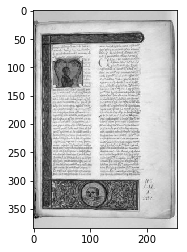

In [134]:

myplot = plt.imshow(img)
myplot.set_cmap('gray')

In [135]:
img

array([[187, 187, 186, ..., 218, 220, 222],
       [186, 186, 186, ..., 219, 221, 223],
       [186, 186, 186, ..., 220, 222, 224],
       ..., 
       [191, 191, 191, ..., 223, 224, 225],
       [191, 191, 191, ..., 223, 224, 224],
       [191, 191, 191, ..., 224, 225, 225]], dtype=uint8)

In [136]:
(hogim, a) = hogimg(img);

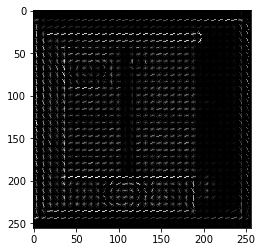

In [137]:
myplot = plt.imshow(hogim)
myplot.set_cmap('gray')

In [138]:
hogim

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.00059139, ...,  0.00421601,
         0.        ,  0.        ],
       [ 0.        ,  0.00113445,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.00032131,  0.        , ...,  0.        ,
         0.0003233 ,  0.        ],
       [ 0.        ,  0.        ,  0.00032674, ...,  0.00493274,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

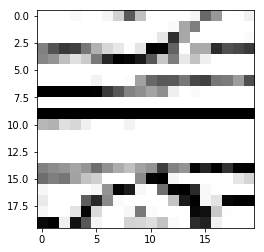

In [116]:
myplot = plt.imshow(deskew(img))
myplot.set_cmap('gray')

In [30]:
cells = [np.hsplit(row,100) for row in np.vsplit(img,50)]

In [37]:
# First half is trainData, remaining is testData
train_cells = [ i[:50] for i in cells ]
test_cells = [ i[50:] for i in cells]

######     Now training      ########################

deskewed = [map(deskew,row) for row in train_cells]
hogdata = [map(hog,row) for row in deskewed]
trainData = np.float32(hogdata).reshape(-1,64)
responses = np.float32(np.repeat(np.arange(10),250)[:,np.newaxis])

In [ ]:
svm = cv2.ml.SVM_create()

In [43]:
svm.train(trainData,responses, params=svm_params)
svm.save('svm_data.dat')

TypeError: only length-1 arrays can be converted to Python scalars

In [41]:
######     Now testing      ########################

deskewed = [map(deskew,row) for row in test_cells]
hogdata = [map(hog,row) for row in deskewed]
testData = np.float32(hogdata).reshape(-1,bin_n*4)
result = svm.predict_all(testData)

#######   Check Accuracy   ########################
mask = result==responses
correct = np.count_nonzero(mask)
print correct*100.0/result.size

NameError: name 'svm' is not defined